In [1]:
%matplotlib inline
import torch
from d2l import torch as d2l

## Vanishing and Exploding Gradients:

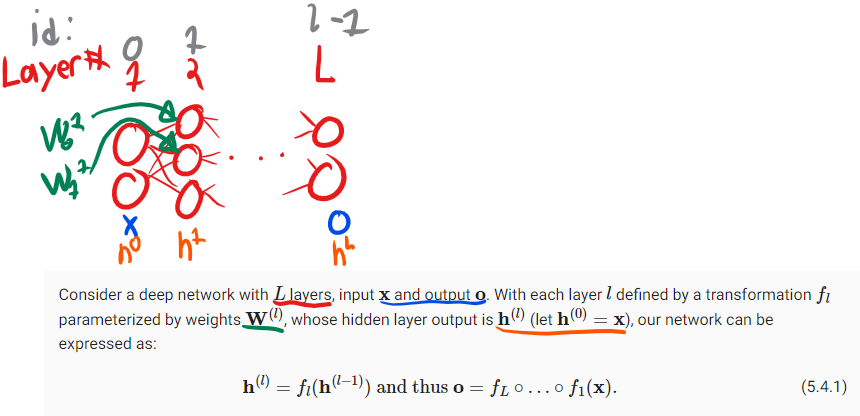

### Vanishing gradients.
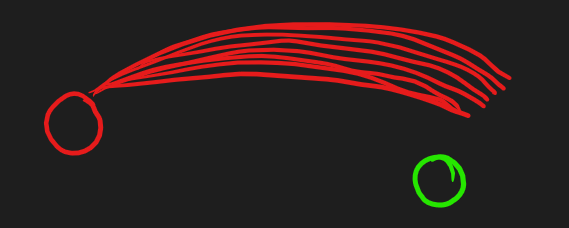

The example size of a possibly vanishing gradient.

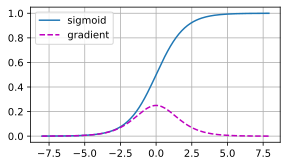

In [2]:


x = torch.arange(-8.0, 8.0, 0.1, requires_grad=True)
y = torch.sigmoid(x)
y.backward(torch.ones_like(x))

d2l.plot(x.detach().numpy(), [y.detach().numpy(), x.grad.numpy()],
         legend=['sigmoid', 'gradient'], figsize=(4.5, 2.5))

Because of this ReLU's are a better choice for this instead as it does not need to be in a specific zone.

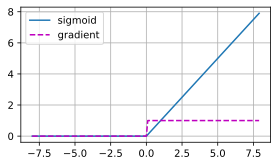

In [3]:
x = torch.arange(-8.0, 8.0, 0.1, requires_grad=True)
y = torch.relu(x)
y.backward(torch.ones_like(x))

d2l.plot(x.detach().numpy(), [y.detach().numpy(), x.grad.numpy()],
         legend=['sigmoid', 'gradient'], figsize=(4.5, 2.5))

### Exploding Gradents
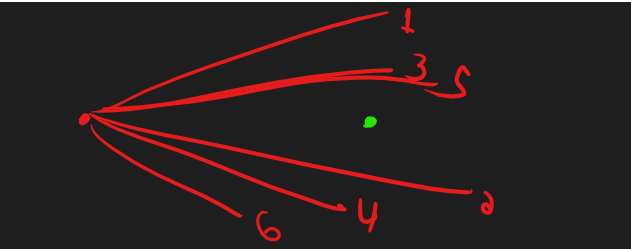

In [4]:
# example
M = torch.normal(0, 1, size=(4, 4))
print('a single matrix \n',M)
for i in range(100):
    M = M @ torch.normal(0, 1, size=(4, 4))
print('after multiplying 100 matrices\n', M)

a single matrix 
 tensor([[ 2.2847,  0.3247, -1.4466,  0.3118],
        [-0.1008, -1.2579,  0.3082,  1.8433],
        [ 0.7543, -2.1380,  0.3229,  0.7355],
        [ 0.3357, -0.7895, -0.3345, -0.1454]])
after multiplying 100 matrices
 tensor([[-4.3994e+28, -8.2563e+27, -3.3397e+28,  1.0120e+28],
        [-2.3004e+28, -4.3172e+27, -1.7463e+28,  5.2915e+27],
        [-1.5576e+28, -2.9230e+27, -1.1824e+28,  3.5827e+27],
        [-2.9180e+27, -5.4762e+26, -2.2151e+27,  6.7120e+26]])


### Permutation Symmetry
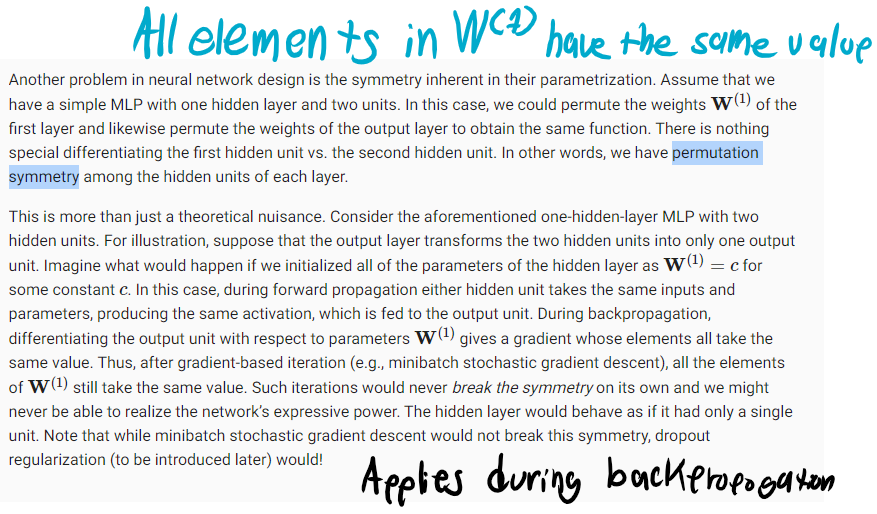

## How to break Permutation Symmetry

1. Use a normal distribution to randomize the value of the weights.
2. Use a varying distribution to randomize the value of the weights ex:
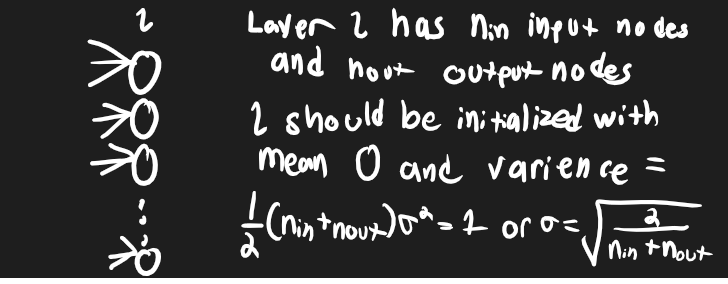
